In [1]:
%pip install --upgrade pip
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install torch
%pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""Kyrylo Boiko Lab 4"""

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
"""Kyrylo Boiko Lab 4"""

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


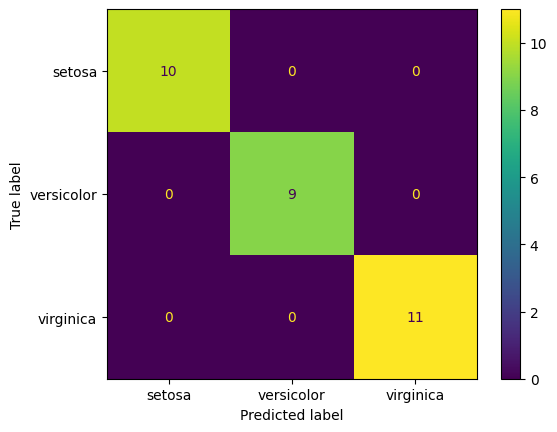

In [ ]:
"""Kyrylo Boiko Lab 4"""

accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='macro')
recall = recall_score(y_test, y_pred_logreg, average='macro')
f1 = f1_score(y_test, y_pred_logreg, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=iris.target_names)
plt.show()

In [ ]:
"""Kyrylo Boiko Lab 4"""

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

Decision Tree Accuracy: 1.00
Decision Tree Precision: 1.00
Decision Tree Recall: 1.00
Decision Tree F1 Score: 1.00


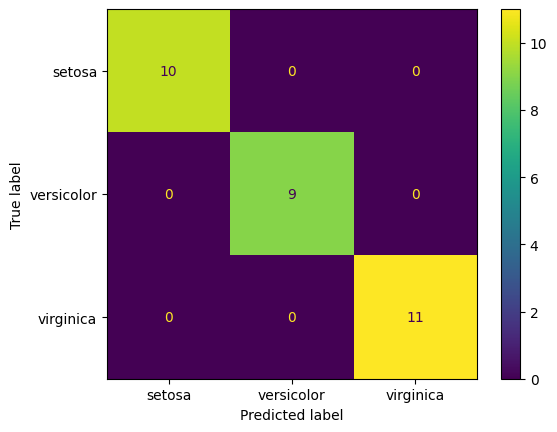

In [6]:
"""Kyrylo Boiko Lab 4"""

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_tree = recall_score(y_test, y_pred_tree, average='macro')
f1_tree = f1_score(y_test, y_pred_tree, average='macro')


print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print(f"Decision Tree Precision: {precision_tree:.2f}")
print(f"Decision Tree Recall: {recall_tree:.2f}")
print(f"Decision Tree F1 Score: {f1_tree:.2f}")
ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test, display_labels=iris.target_names)
plt.show()

In [ ]:
"""Kyrylo Boiko Lab 4"""

logreg_scores = cross_val_score(log_reg, X, y, cv=5)
print("Logistic Regression Cross-Val Accuracy:", logreg_scores.mean())

tree_scores = cross_val_score(tree_clf, X, y, cv=5)
print("Decision Tree Cross-Val Accuracy:", tree_scores.mean())
print("Training Accuracy (LogReg):", log_reg.score(X_train, y_train))
print("Test Accuracy (LogReg):", log_reg.score(X_test, y_test))

print("Training Accuracy (Tree):", tree_clf.score(X_train, y_train))
print("Test Accuracy (Tree):", tree_clf.score(X_test, y_test))


Logistic Regression Cross-Val Accuracy: 0.9733333333333334
Decision Tree Cross-Val Accuracy: 0.9600000000000002
Training Accuracy (LogReg): 0.975
Test Accuracy (LogReg): 1.0
Training Accuracy (Tree): 1.0
Test Accuracy (Tree): 1.0


In [8]:
"""Kyrylo Boiko Lab 4"""

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)




0.1%

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%
0.7%

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [ ]:
"""Kyrylo Boiko Lab 4"""

X_train = train_dataset.data.numpy().reshape(-1, 28*28)
y_train = train_dataset.targets.numpy()

X_test = test_dataset.data.numpy().reshape(-1, 28*28)
y_test = test_dataset.targets.numpy()

X_train = X_train / 255.0
X_test = X_test / 255.0


Logistic Regression on Fashion-MNIST
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


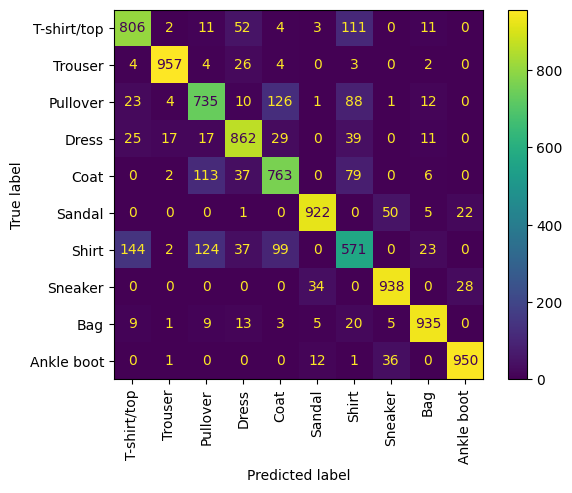

In [10]:
"""Kyrylo Boiko Lab 4"""

log_reg_fashion = LogisticRegression(max_iter=10000, verbose=1)
log_reg_fashion.fit(X_train, y_train)

y_pred_logreg_fashion = log_reg_fashion.predict(X_test)

accuracy_logreg_fashion = accuracy_score(y_test, y_pred_logreg_fashion)
precision_logreg_fashion = precision_score(y_test, y_pred_logreg_fashion, average='macro')
recall_logreg_fashion = recall_score(y_test, y_pred_logreg_fashion, average='macro')
f1_logreg_fashion = f1_score(y_test, y_pred_logreg_fashion, average='macro')

print(f"Logistic Regression on Fashion-MNIST\nAccuracy: {accuracy_logreg_fashion:.2f}")
print(f"Precision: {precision_logreg_fashion:.2f}")
print(f"Recall: {recall_logreg_fashion:.2f}")
print(f"F1 Score: {f1_logreg_fashion:.2f}")

disp = ConfusionMatrixDisplay.from_estimator(log_reg_fashion, X_test, y_test, display_labels=class_names)
plt.xticks(rotation='vertical')
plt.show()


Decision Tree on Fashion-MNIST
Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


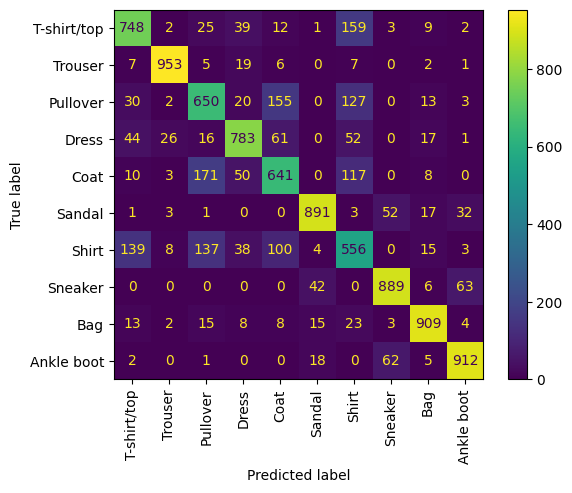

In [11]:
"""Kyrylo Boiko Lab 4"""

tree_clf_fashion = DecisionTreeClassifier()
tree_clf_fashion.fit(X_train, y_train)

y_pred_tree_fashion = tree_clf_fashion.predict(X_test)

accuracy_tree_fashion = accuracy_score(y_test, y_pred_tree_fashion)
precision_tree_fashion = precision_score(y_test, y_pred_tree_fashion, average='macro')
recall_tree_fashion = recall_score(y_test, y_pred_tree_fashion, average='macro')
f1_tree_fashion = f1_score(y_test, y_pred_tree_fashion, average='macro')

print(f"Decision Tree on Fashion-MNIST\nAccuracy: {accuracy_tree_fashion:.2f}")
print(f"Precision: {precision_tree_fashion:.2f}")
print(f"Recall: {recall_tree_fashion:.2f}")
print(f"F1 Score: {f1_tree_fashion:.2f}")

disp = ConfusionMatrixDisplay.from_estimator(tree_clf_fashion, X_test, y_test, display_labels=class_names)
plt.xticks(rotation='vertical')
plt.show()
